# Animating Neural Network

Import libraries

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera

Define network

In [2]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(1, 6)
        self.fc2 = nn.Linear(6, 6)
        self.fc3 = nn.Linear(6, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

Define input (x) and target (y)

In [3]:
x = np.array([np.linspace(-3*np.pi,3*np.pi,100)])
x = np.transpose(x)

input = torch.from_numpy(x).float()
y = np.cos(x)
target = torch.from_numpy(y).float()

Define optimizer and loss criterion

In [4]:
optimizer = optim.SGD(net.parameters(), lr=0.01)
criterion = nn.MSELoss()

Function to print neural network architecture

In [5]:
def squash(x):
    return (1 + abs(x)/(abs(x)+1))/2

def vis_architecture(net):
    params = np.array([ param.detach().numpy() for param in net.parameters() ])
    #print(params)
    weights = []

    #loop for input neurons
    for i in range ((params[0].shape)[1]):
        axs[0].plot(0, i - ((params[0].shape)[1]-1)/2, marker='o', color='black', ms=10);

    #loop for neurons
    for i in range (0,len(params),2):
        weights.append(params[i])
        
        for j in range (len(params[i])):
            axs[0].plot(i/2+1, j - (len(params[i])-1)/2, marker='o', color='black', ms=10);
        
    #loop for biases
    for i in range (1,len(params),2):        
        for j in range (len(params[i])):
            bias = params[i][j]
            axs[0].plot(int(i/2)+1, j - (len(params[i])-1)/2 - 0.25, marker='o', color=[0,0,1,squash(bias)] if bias>=0 else [1,0,0,squash(bias)], ms=6.5*squash(bias));
    
    #loop for weights
    for w in range(len(weights)):
        for i in range(weights[w].shape[1]):
            for j in range(weights[w].shape[0]):
                axs[0].plot( [w, w+1] , [i - (weights[w].shape[1]-1)/2, j - (weights[w].shape[0]-1)/2], c='blue' if weights[w][j][i]>=0 else 'red', ls='--', lw=2.5*squash(weights[w][j][i]), alpha=squash(weights[w][j][i]) )

[2000] loss: 0.463
[4000] loss: 0.336
[6000] loss: 0.190
[8000] loss: 0.061
[10000] loss: 0.037
[12000] loss: 0.023
[14000] loss: 0.018
[16000] loss: 0.013
[18000] loss: 0.010
[20000] loss: 0.009


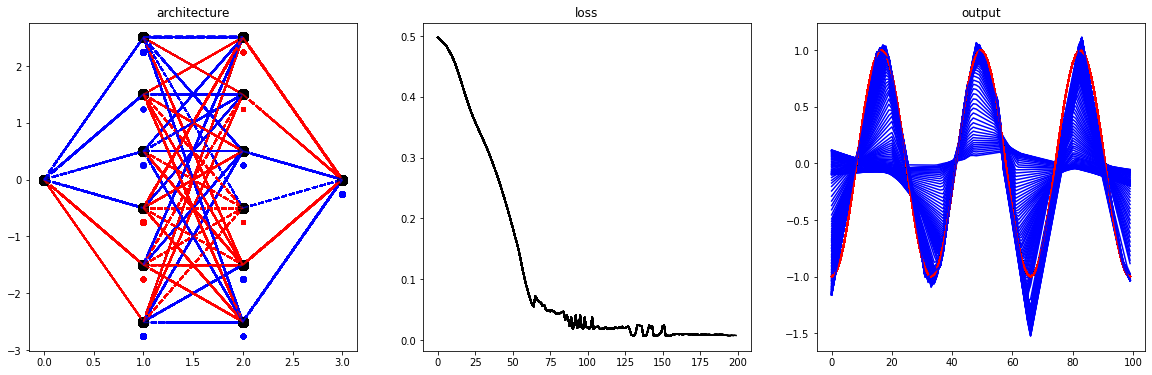

In [6]:
fig, axs = plt.subplots(1,3,figsize=(20,20))
camera = Camera(fig)

running_loss = 0.0
losses = []

for i in range(20000):
    # in your training loop:
    optimizer.zero_grad()   # zero the gradient buffers
    output = net(input)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()    # Does the update
    
        
    # print statistics
    running_loss += loss.item()
    if i % 2000 == 1999:    # print every 2000 mini-batches
        print('[%d] loss: %.3f' % (i + 1, running_loss / 2000))
        running_loss = 0.0
        
    if i%100 == 99:
        axs[0].set_title('architecture')
        vis_architecture(net)
        
        axs[1].set_title('loss')
        losses.append(loss.item())
        axs[1].plot(losses, 'black')
        
        axs[2].set_title('output')
        axs[2].plot(y, 'red')
        axs[2].plot(output.detach().numpy(), 'blue')
        
        [ax.set_aspect(1/ax.get_data_ratio()) for ax in axs]
        camera.snap()

In [7]:
animation = camera.animate()
animation.save('celluloid_minimal.gif', writer='PillowWriter')

MovieWriter PillowWriter unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.
